## Prova 2 - C210 - L1
-------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Nome: Luan Robert Aparecido Santos    
#### Matrícula: 440

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## Instruções:
- A prova deve ser resolvida em 1h30min.
- A prova é Individual.
- Resolver as questões e enviar as respostas através desse Jupyter Notebook.
- Interpretação faz parte da prova.
- Não será permitida qualquer tipo de consulta, exceto à folha de resumo escrita e individual.

Boa Prova.

# (45 Pontos) **`Questão 1`**

Uma possível aplicação para sistemas fuzzy é a realização de controles para
diversos sistemas, como por exemplo controle de temperatura. 

Implemente o seguinte sistema fuzzy utilizando as informações abaixo.

A) (**20 Pontos**) Gráficos para as funções de pertinências de todas as variáveis.

B) (**25 Pontos**) Valores de saída do sistema fuzzy para os seguintes pares de entrada:
- temperatura: 25; humidade: 35;
- temperatura: 28; humidade: 18;
- temperatura: 33; humidade: 40;
- temperatura: 12; humidade: 65;

In [1]:
!pip install scikit-fuzzy



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as ctrl

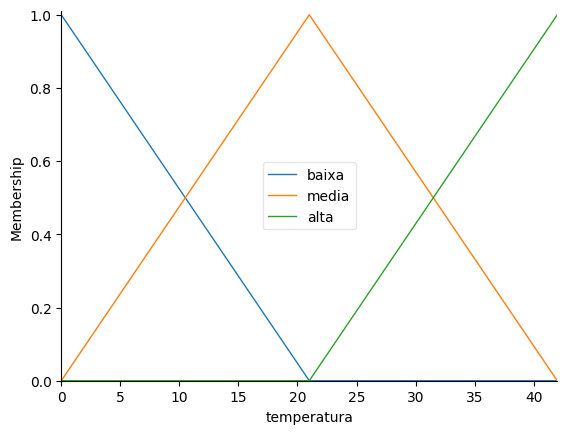

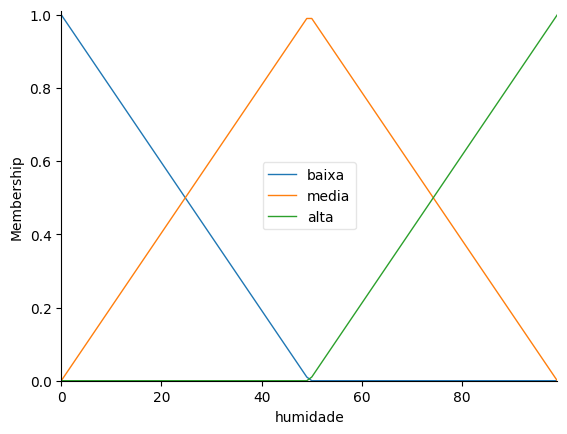

In [ ]:
# Definindo universo de discurso e nome da variável
temperatura = ctrl.Antecedent(np.arange(0, 43, 1), 'temperatura')  

humidade = ctrl.Antecedent(np.arange(0,100,1), 'humidade')

# Criando função de pertinência usando automf
temperatura.automf(names=['baixa', 'media', 'alta'])

humidade.automf(names=['baixa', 'media', 'alta'])


# Mostre o Gráfico:
temperatura.view(title='Funçõe de Pertnência - Temperatura')
humidade.view(title='Função de Pertinência - Humidade')

c:\Users\luanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


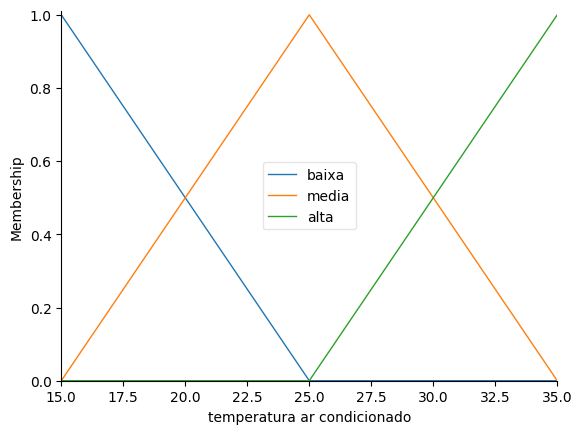

In [35]:
temperatura_ar_condicionado = ctrl.Consequent(np.arange(15, 36, 1), 'temperatura ar condicionado') 

# Criando função de pertinência usando automf
temperatura_ar_condicionado.automf(names=['baixa', 'media', 'alta'])

# Mostre o Gráfico:
temperatura_ar_condicionado.view()

Utilize a seguinte matriz de regras abaixo,
considerando sempre o conectivo **E**:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Data Table</title>
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 18px;
            text-align: left;
        }
        th, td {
            padding: 12px;
            border: 1px solid #ddd;
        }
        th {
            background-color: #f2f2f2;
        }
        td:first-child, th:first-child {
            background-color: #f2f2f2;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th></th>
                <th>Baixa</th>
                <th>Média</th>
                <th>Alta</th>
                <th>Temperatura</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Baixa</td>
                <td>Alta</td>
                <td>Média</td>
                <td>Baixa</td>
            </tr>
            <tr>
                <td>Média</td>
                <td>Alta</td>
                <td>Média</td>
                <td>Baixa</td>
            </tr>
            <tr>
                <td>Alta</td>
                <td>Média</td>
                <td>Baixa</td>
                <td>Baixa</td>
            </tr>
            <tr>
                <td>Umidade</td>
            </tr>
        </tbody>
    </table>
</body>
</html>


In [36]:
# Regras fuzzy

regra1 = ctrl.Rule(humidade['baixa'] & temperatura['baixa'], temperatura_ar_condicionado['alta'])
regra2 = ctrl.Rule(humidade['baixa'] & temperatura['media'], temperatura_ar_condicionado['media'])
regra3 = ctrl.Rule(humidade['baixa'] & temperatura['alta'], temperatura_ar_condicionado['baixa'])

regra4 = ctrl.Rule(humidade['media'] & temperatura['baixa'], temperatura_ar_condicionado['alta'])
regra5 = ctrl.Rule(humidade['media'] & temperatura['media'], temperatura_ar_condicionado['media'])
regra6 = ctrl.Rule(humidade['media'] & temperatura['alta'], temperatura_ar_condicionado['baixa'])

regra7 = ctrl.Rule(humidade['alta'] & temperatura['baixa'], temperatura_ar_condicionado['media'])
regra8 = ctrl.Rule(humidade['alta'] & temperatura['media'], temperatura_ar_condicionado['baixa'])
regra9 = ctrl.Rule(humidade['alta'] & temperatura['alta'], temperatura_ar_condicionado['baixa'])

In [37]:
# Controle fuzzy
sistema_controle = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5, regra6,
    regra7, regra8, regra9
])
simulador = ctrl.ControlSystemSimulation(sistema_controle)

Cenário 1 - Temperatura Ajustada: 24.81 Graus


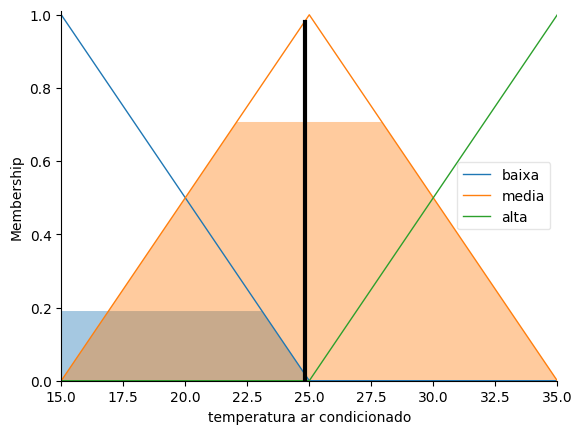

In [38]:
# Definição dos valores de entrada

# Temperatura = 25 e Humidade = 35
simulador.input['temperatura'] = 25
simulador.input['humidade'] = 35

simulador.compute()

print(f"Cenário 1 - Temperatura Ajustada: {simulador.output['temperatura ar condicionado']:.2f} Graus")

temperatura_ar_condicionado.view(sim=simulador)


dict_keys(['temperatura ar condicionado'])
Cenário 2 - Temperatura Ajustada: 24.46 Graus


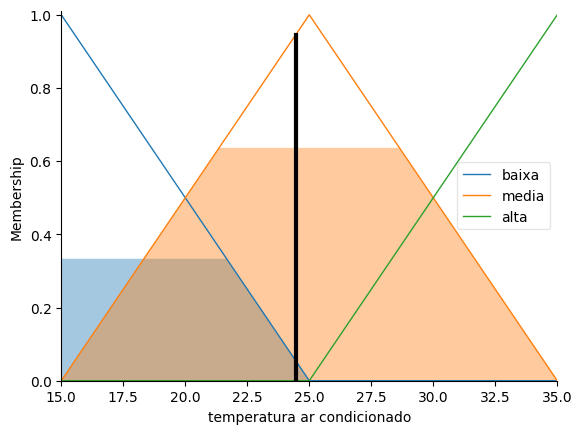

In [40]:
# Definição dos valores de entrada

# Temperatura = 28 e Humidade = 18
simulador.input['temperatura'] = 28
simulador.input['humidade'] = 18

simulador.compute()

print(simulador.output.keys())

print(f"Cenário 2 - Temperatura Ajustada: {simulador.output['temperatura ar condicionado']:.2f} Graus")

temperatura_ar_condicionado.view(sim=simulador)


dict_keys(['temperatura ar condicionado'])
Cenário 3 - Temperatura Ajustada: 23.42 Graus


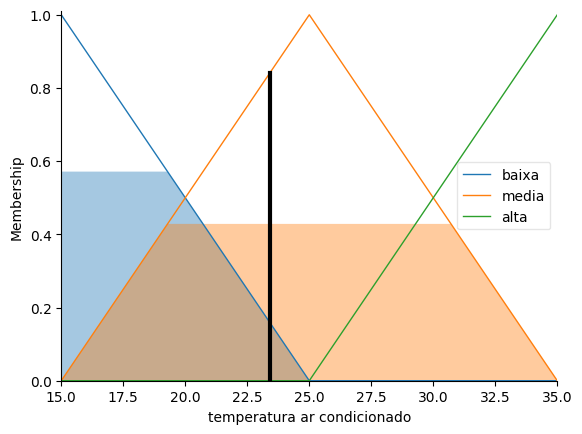

In [41]:
# Definição dos valores de entrada

# Temperatura = 33 e Humidade = 40
simulador.input['temperatura'] = 33
simulador.input['humidade'] = 40

simulador.compute()

print(simulador.output.keys())

print(f"Cenário 3 - Temperatura Ajustada: {simulador.output['temperatura ar condicionado']:.2f} Graus")

temperatura_ar_condicionado.view(sim=simulador)


dict_keys(['temperatura ar condicionado'])
Cenário 4 - Temperatura Ajustada: 25.37 Graus


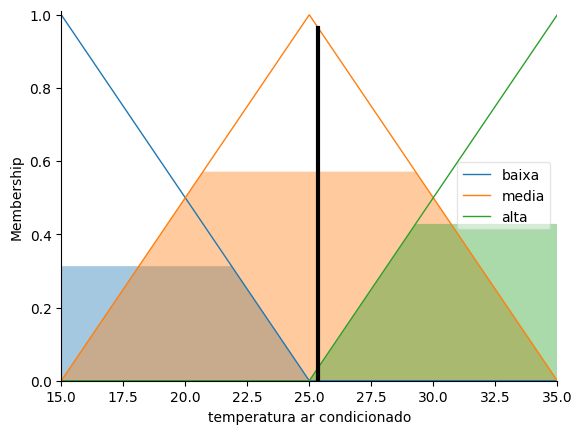

In [42]:
# Definição dos valores de entrada

# Temperatura = 12 e Humidade = 65
simulador.input['temperatura'] = 12
simulador.input['humidade'] = 65

simulador.compute()

print(simulador.output.keys())

print(f"Cenário 4 - Temperatura Ajustada: {simulador.output['temperatura ar condicionado']:.2f} Graus")

temperatura_ar_condicionado.view(sim=simulador)


In [43]:
# Computar o resultado
simulador.compute()

In [45]:
# Mostrar o resultado
print(f"Temperatura do ar condicionado: {simulador.output['temperatura ar condicionado']}")

Temperatura do ar condicionado: 25.365042370451913


# (25 Pontos) **`Questão 2`**

Faça a classificação das espécies de plantas utilizando a rede perceptron.

A) Dividir os dados em conjuntos de treino (80%) e teste (20%)

B) Treinar e testar o Perceptron

C) Testar o Perceptron com dados de teste

D) Mostrar os resultados

E) Calcular e mostrar a acurácia


In [46]:
data = """
sepal_largura,sepal_comprimento,tipo
5.1,3.5,"virginica"
4.7,3.2,"virginica"
5,3.6,"virginica"
4.6,3.4,"virginica"
4.4,2.9,"virginica"
5.4,3.7,"virginica"
4.8,3,"virginica"
5.8,4,"virginica"
5.4,3.9,"virginica"
5.7,3.8,"virginica"
5.4,3.4,"virginica"
4.6,3.6,"virginica"
4.8,3.4,"virginica"
5,3.4,"virginica"
5.2,3.4,"virginica"
4.8,3.1,"virginica"
5.2,4.1,"virginica"
4.9,3.1,"virginica"
5.5,3.5,"virginica"
4.4,3,"virginica"
5,3.5,"virginica"
4.4,3.2,"virginica"
5.1,3.8,"virginica"
5.1,3.8,"virginica"
5.3,3.7,"virginica"
5.8,2.7,"setosa"
6.3,2.9,"setosa"
7.6,3,"setosa"
7.3,2.9,"setosa"
7.2,3.6,"setosa"
6.4,2.7,"setosa"
5.7,2.5,"setosa"
6.4,3.2,"setosa"
7.7,3.8,"setosa"
6,2.2,"setosa"
5.6,2.8,"setosa"
6.3,2.7,"setosa"
7.2,3.2,"setosa"
6.1,3,"setosa"
7.2,3,"setosa"
7.9,3.8,"setosa"
6.3,2.8,"setosa"
7.7,3,"setosa"
6.4,3.1,"setosa"
6.9,3.1,"setosa"
6.9,3.1,"setosa"
6.8,3.2,"setosa"
6.7,3,"setosa"
6.5,3,"setosa"
5.9,3,"setosa"
"""

In [47]:
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            is_error  = False
            epoch_errors = 0
            
            for xi, target in zip(x, d):
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += abs(current_error)
                
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
                    
            self.total_error.append(epoch_errors / len(x))
            epoch += 1
    
    def accuracy(self, x, d):
        correct_predictions = 0
        total_predictions = len(d)
        
        for xi, target in zip(x, d):
            predicted = self.predict(xi)
            predicted = self.activation(predicted)
            if predicted == target:
                correct_predictions += 1
                
        return correct_predictions / total_predictions
    
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

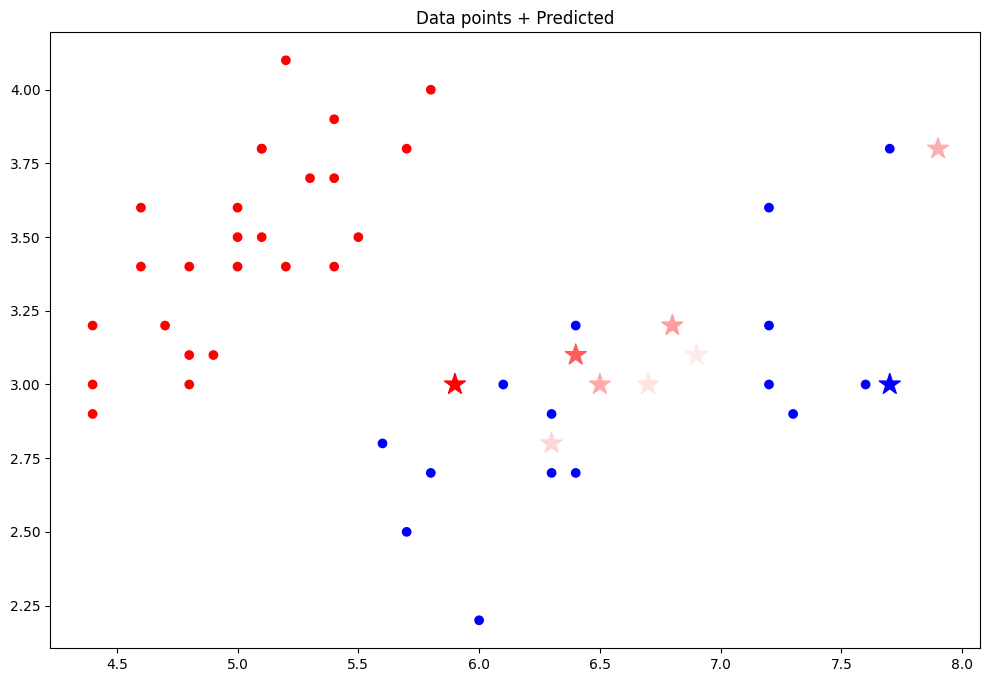

Acurácia: 0.0


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Convert the data string to a pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# 2. Pré-processamento dos dados
# Converter as classes para valores numéricos
df['tipo'] = df['tipo'].apply(lambda x: 1 if x == 'virginica' else -1)

# Dividir as features e os rótulos
X = df[['sepal_largura', 'sepal_comprimento']].values
y = df['tipo'].values

# Dividir os dados em conjuntos de treino e teste
limite = int(len(X) * 0.8)

x_treino = X[0:limite]
x_teste = X[limite: ]

d_treino = y[0:limite]
d_teste = y[limite: ]
    
# 3. Treinar e testar o Perceptron

# Testar o Perceptron com dados de teste
p = Perceptron(lr = 0.1, n_epochs = 100)
p.train(x = x_treino, d = d_treino)

# Mostrar os resultados
teste_resultado = p.predict(x_teste)

plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x_treino[:, 0], x_treino[:, 1], c = d_treino, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

# Calcular e mostrar a acurácia
acuracia = np.mean(teste_resultado == d_teste)
print("Acurácia:", acuracia)

# (10 Pontos) **`Questão 3`** Explique com suas palavras o que é um problema `linearmente separável` e de um exemplo.

**Resposta Q3** : é quando a gente tem, por exemplo, dois conjuntos de dados e consegue passar uma reta e dividí-lo, sem sobrepor  algum valor de outro conjunto. Consegue dividir um conjunto de um lado da reta e o outro conjunto do outro

---
---

# (10 Pontos) **`Questão 4`** 
# Considere uma rede neural definida como::
# mlp = MLP(lr=0.05, e=1000, layers=[4, 8, 1]).
# Assinale a alternativa **`correta`**.


[ ] **A.** A rede neural possui três camadas ocultas.

[ ] **B.** O parâmetro lr define a quantidade de épocas de treinamento.

[ ] **C.** O parâmetro e representa a taxa de aprendizado da rede neural.

[X] **D.** A rede possui uma camada de saída com 1 neurônio.

[ ] **E.** A rede neural possui 4 neurônios na camada de entrada e 8 na camada de saída.

**Resposta Q4:**  Letra D
---
---

## (10 Pontos) **`Questão 5`** Em uma rede ADALINE, o modelo de aprendizagem utiliza:

[ ] **A.** Função de ativação não linear, como a função sigmoide.

[X] **B.** Função de ativação linear para calcular a saída.

[ ] **C.** Apenas a função de perda quadrática para otimização.

[ ] **D.** Treinamento baseado em retropropagação como o perceptron multicamadas.


**Resposta Q5:** Letra B
---
---